<a href="https://colab.research.google.com/github/michael890421/demo4001/blob/main/project1_%E6%B8%B8%E6%99%BA%E9%88%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
covid = pd.read_csv("owid-covid-data.csv")
countries = pd.read_csv("covid19_by_country.csv")

In [7]:
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166322,ZWE,Africa,Zimbabwe,2022-03-02,237503.0,632.0,416.286,5396.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166323,ZWE,Africa,Zimbabwe,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166324,ZWE,Africa,Zimbabwe,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [9]:
countries

,Country,Tests,Test Pop,Density,Urban Pop,Quarantine,Schools,Restrictions,Hospital Bed,sex0,...,Male Lung,Median Age,GDP 2018,Crime Index,Population 2020,Smoking 2016,Females 2018,Total Infected,Total Deaths,Total Recovered
0,Albania,NaN,NaN,105.0,63.0,NaN,NaN,NaN,2.9,1.08,...,17.04,32.9,1.510250e+10,40.02,2877.797,28.7,49.063095,750,30,431
1,Algeria,NaN,NaN,18.0,73.0,NaN,NaN,NaN,1.9,1.05,...,12.81,28.1,1.737580e+11,54.41,43851.044,15.6,49.484268,3649,437,1651
2,Argentina,NaN,NaN,17.0,93.0,3/20/2020,NaN,NaN,5.0,1.05,...,42.59,31.7,5.198715e+11,62.96,45195.774,21.8,51.237348,4127,207,1162
3,Armenia,694.0,4269.802594,104.0,63.0,NaN,NaN,NaN,4.2,1.13,...,35.99,35.1,1.243309e+10,20.78,2963.243,24.1,52.956577,1867,30,866
4,Australia,31635.0,806.065560,3.0,86.0,NaN,NaN,3/23/2020,3.8,1.06,...,22.16,38.7,1.433904e+12,42.70,25499.884,14.7,50.199623,6744,89,5665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Ukraine,500.0,87467.524000,75.0,69.0,NaN,NaN,NaN,8.8,1.06,...,22.11,40.6,1.308324e+11,49.04,43733.762,28.9,53.687751,9410,239,992
92,United Arab Emirates,125000.0,79.123216,118.0,86.0,NaN,NaN,NaN,1.2,1.05,...,20.21,30.3,4.141789e+11,15.52,9890.402,28.9,30.636688,11380,89,2181
93,United Kingdom,50442.0,1345.823143,281.0,83.0,NaN,3/20/2020,3/20/2020,2.8,1.05,...,26.84,40.5,2.855297e+12,43.64,67886.011,22.3,50.635275,162350,21745,813
94,Uruguay,NaN,NaN,20.0,96.0,NaN,NaN,NaN,2.8,1.04,...,49.85,35.0,5.959689e+10,52.33,3473.730,16.8,51.721543,625,15,394


## 合併資料檢視

In [12]:
combine = pd.merge(countries, covid, how='right',left_on='Country', right_on='location')
combine

,Country,Tests,Test Pop,Density,Urban Pop,Quarantine,Schools,Restrictions,Hospital Bed,sex0,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


## 兩個資料物件合併

In [13]:
death = pd.DataFrame(combine.groupby(['Country','continent'])["total_deaths"].max()).reset_index(drop=False)
cases = pd.DataFrame(combine.groupby(['Country'])["total_cases"].max()).reset_index(drop=False)

#找出每個國家的確診數以及死亡率
death_rate = pd.merge(death, cases, how='inner',left_on='Country', right_on='Country')
death_rate["death_rate"] = round((death_rate["total_deaths"]/death_rate["total_cases"])*100,2)
death_rate

,Country,continent,total_deaths,total_cases,death_rate
0,Albania,Europe,3478.0,272030.0,1.28
1,Algeria,Africa,6853.0,265227.0,2.58
2,Argentina,South America,126708.0,8934328.0,1.42
3,Armenia,Asia,8528.0,421226.0,2.02
4,Australia,Oceania,5416.0,3362035.0,0.16
...,...,...,...,...,...
90,United Arab Emirates,Asia,2301.0,882477.0,0.26
91,United Kingdom,Europe,162152.0,19172095.0,0.85
92,United States,North America,958437.0,79265726.0,1.21
93,Uruguay,South America,7040.0,853170.0,0.83


In [16]:
continent = pd.DataFrame(combine.groupby(['continent'])["total_cases"].max())
continent = continent.reset_index(drop=False)
continent = continent.sort_values(by=['continent'])

In [17]:
death_rate.rename(columns={"total_cases": "country_case"}, inplace = True)
continent.rename(columns={"total_cases": "continent_case"}, inplace = True)
case_rate = pd.merge(death_rate, continent, how='left',left_on='continent', right_on='continent')
case_rate["case_per_continent"] = round((case_rate["country_case"]/case_rate["continent_case"])*100,2)
case_rate = case_rate.dropna(subset=['death_rate'])
case_rate=case_rate.sort_values(by=['continent'])

In [18]:
continent

,continent,continent_case
0,Africa,3683172.0
1,Asia,42962953.0
2,Europe,23064766.0
3,North America,79265726.0
4,Oceania,3362035.0
5,South America,29040800.0


<Figure size 432x288 with 0 Axes>

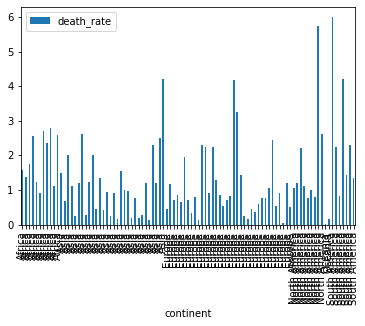

In [19]:
plt.close("all")
plt.figure();
case_rate.plot.bar(x='continent', y = 'death_rate');